In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

def lsm0(x, y):
    k = np.mean(x*y) / np.mean(x**2)
    sigma_k = (1 / len(x))*np.sqrt((np.mean(y**2) / (np.mean(x**2))) - k**2)
    return [k, sigma_k]

In [51]:
lab1 = pd.read_excel("search2.xlsx")
lab1

,N,test001,test002,test003,test011,test012,test013,test101,test102,test103,test111,test112,test113
0,100,10.30,40.10,71.6,372,606,485,257.0,206,263,280.0,257,340
1,2099,1559.44,3498.64,6029.7,5105,6337,5314,640.0,605,576,460.0,473,371
2,4098,3662.31,6741.71,12566.8,9714,12372,11326,683.0,723,730,530.0,438,498
3,6097,4581.58,8777.84,21276.3,14569,18385,16774,710.0,630,741,500.0,467,498
4,8096,8027.27,12502.00,24579.0,19333,24172,22321,745.0,916,712,550.0,489,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190005,191810.00,385714.00,714667.0,454156,576279,452817,1022.6,976,1027,760.0,901,791
96,192004,157115.00,343269.00,649423.0,459018,616115,459473,1010.0,1200,1192,750.0,742,579
97,194003,152621.00,394757.00,646990.0,481464,582003,476623,1026.4,833,949,770.0,942,626
98,196002,189216.00,347059.00,602941.0,467180,599689,470026,1015.8,1146,857,760.0,575,798


In [67]:
lab1["full_mean"] = lab1[['test001', 'test002', 'test003']].mean(axis=1)
lab1["full_worst"] = lab1[['test011', 'test012', 'test013']].mean(axis=1)
lab1["bin_mean"] = lab1[['test101', 'test102', 'test103']].mean(axis=1)
lab1["bin_worst"] = lab1[['test111', 'test112', 'test113']].mean(axis=1)
lab1

,N,test001,test002,test003,test011,test012,test013,test101,test102,test103,test111,test112,test113,full_mean,full_worst,bin_mean,bin_worst
0,100,10.30,40.10,71.6,372,606,485,257.0,206,263,280.0,257,340,40.666667,487.666667,242.000000,292.333333
1,2099,1559.44,3498.64,6029.7,5105,6337,5314,640.0,605,576,460.0,473,371,3695.926667,5585.333333,607.000000,434.666667
2,4098,3662.31,6741.71,12566.8,9714,12372,11326,683.0,723,730,530.0,438,498,7656.940000,11137.333333,712.000000,488.666667
3,6097,4581.58,8777.84,21276.3,14569,18385,16774,710.0,630,741,500.0,467,498,11545.240000,16576.000000,693.666667,488.333333
4,8096,8027.27,12502.00,24579.0,19333,24172,22321,745.0,916,712,550.0,489,590,15036.090000,21942.000000,791.000000,543.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190005,191810.00,385714.00,714667.0,454156,576279,452817,1022.6,976,1027,760.0,901,791,430730.333333,494417.333333,1008.533333,817.333333
96,192004,157115.00,343269.00,649423.0,459018,616115,459473,1010.0,1200,1192,750.0,742,579,383269.000000,511535.333333,1134.000000,690.333333
97,194003,152621.00,394757.00,646990.0,481464,582003,476623,1026.4,833,949,770.0,942,626,398122.666667,513363.333333,936.133333,779.333333
98,196002,189216.00,347059.00,602941.0,467180,599689,470026,1015.8,1146,857,760.0,575,798,379738.666667,512298.333333,1006.266667,711.000000


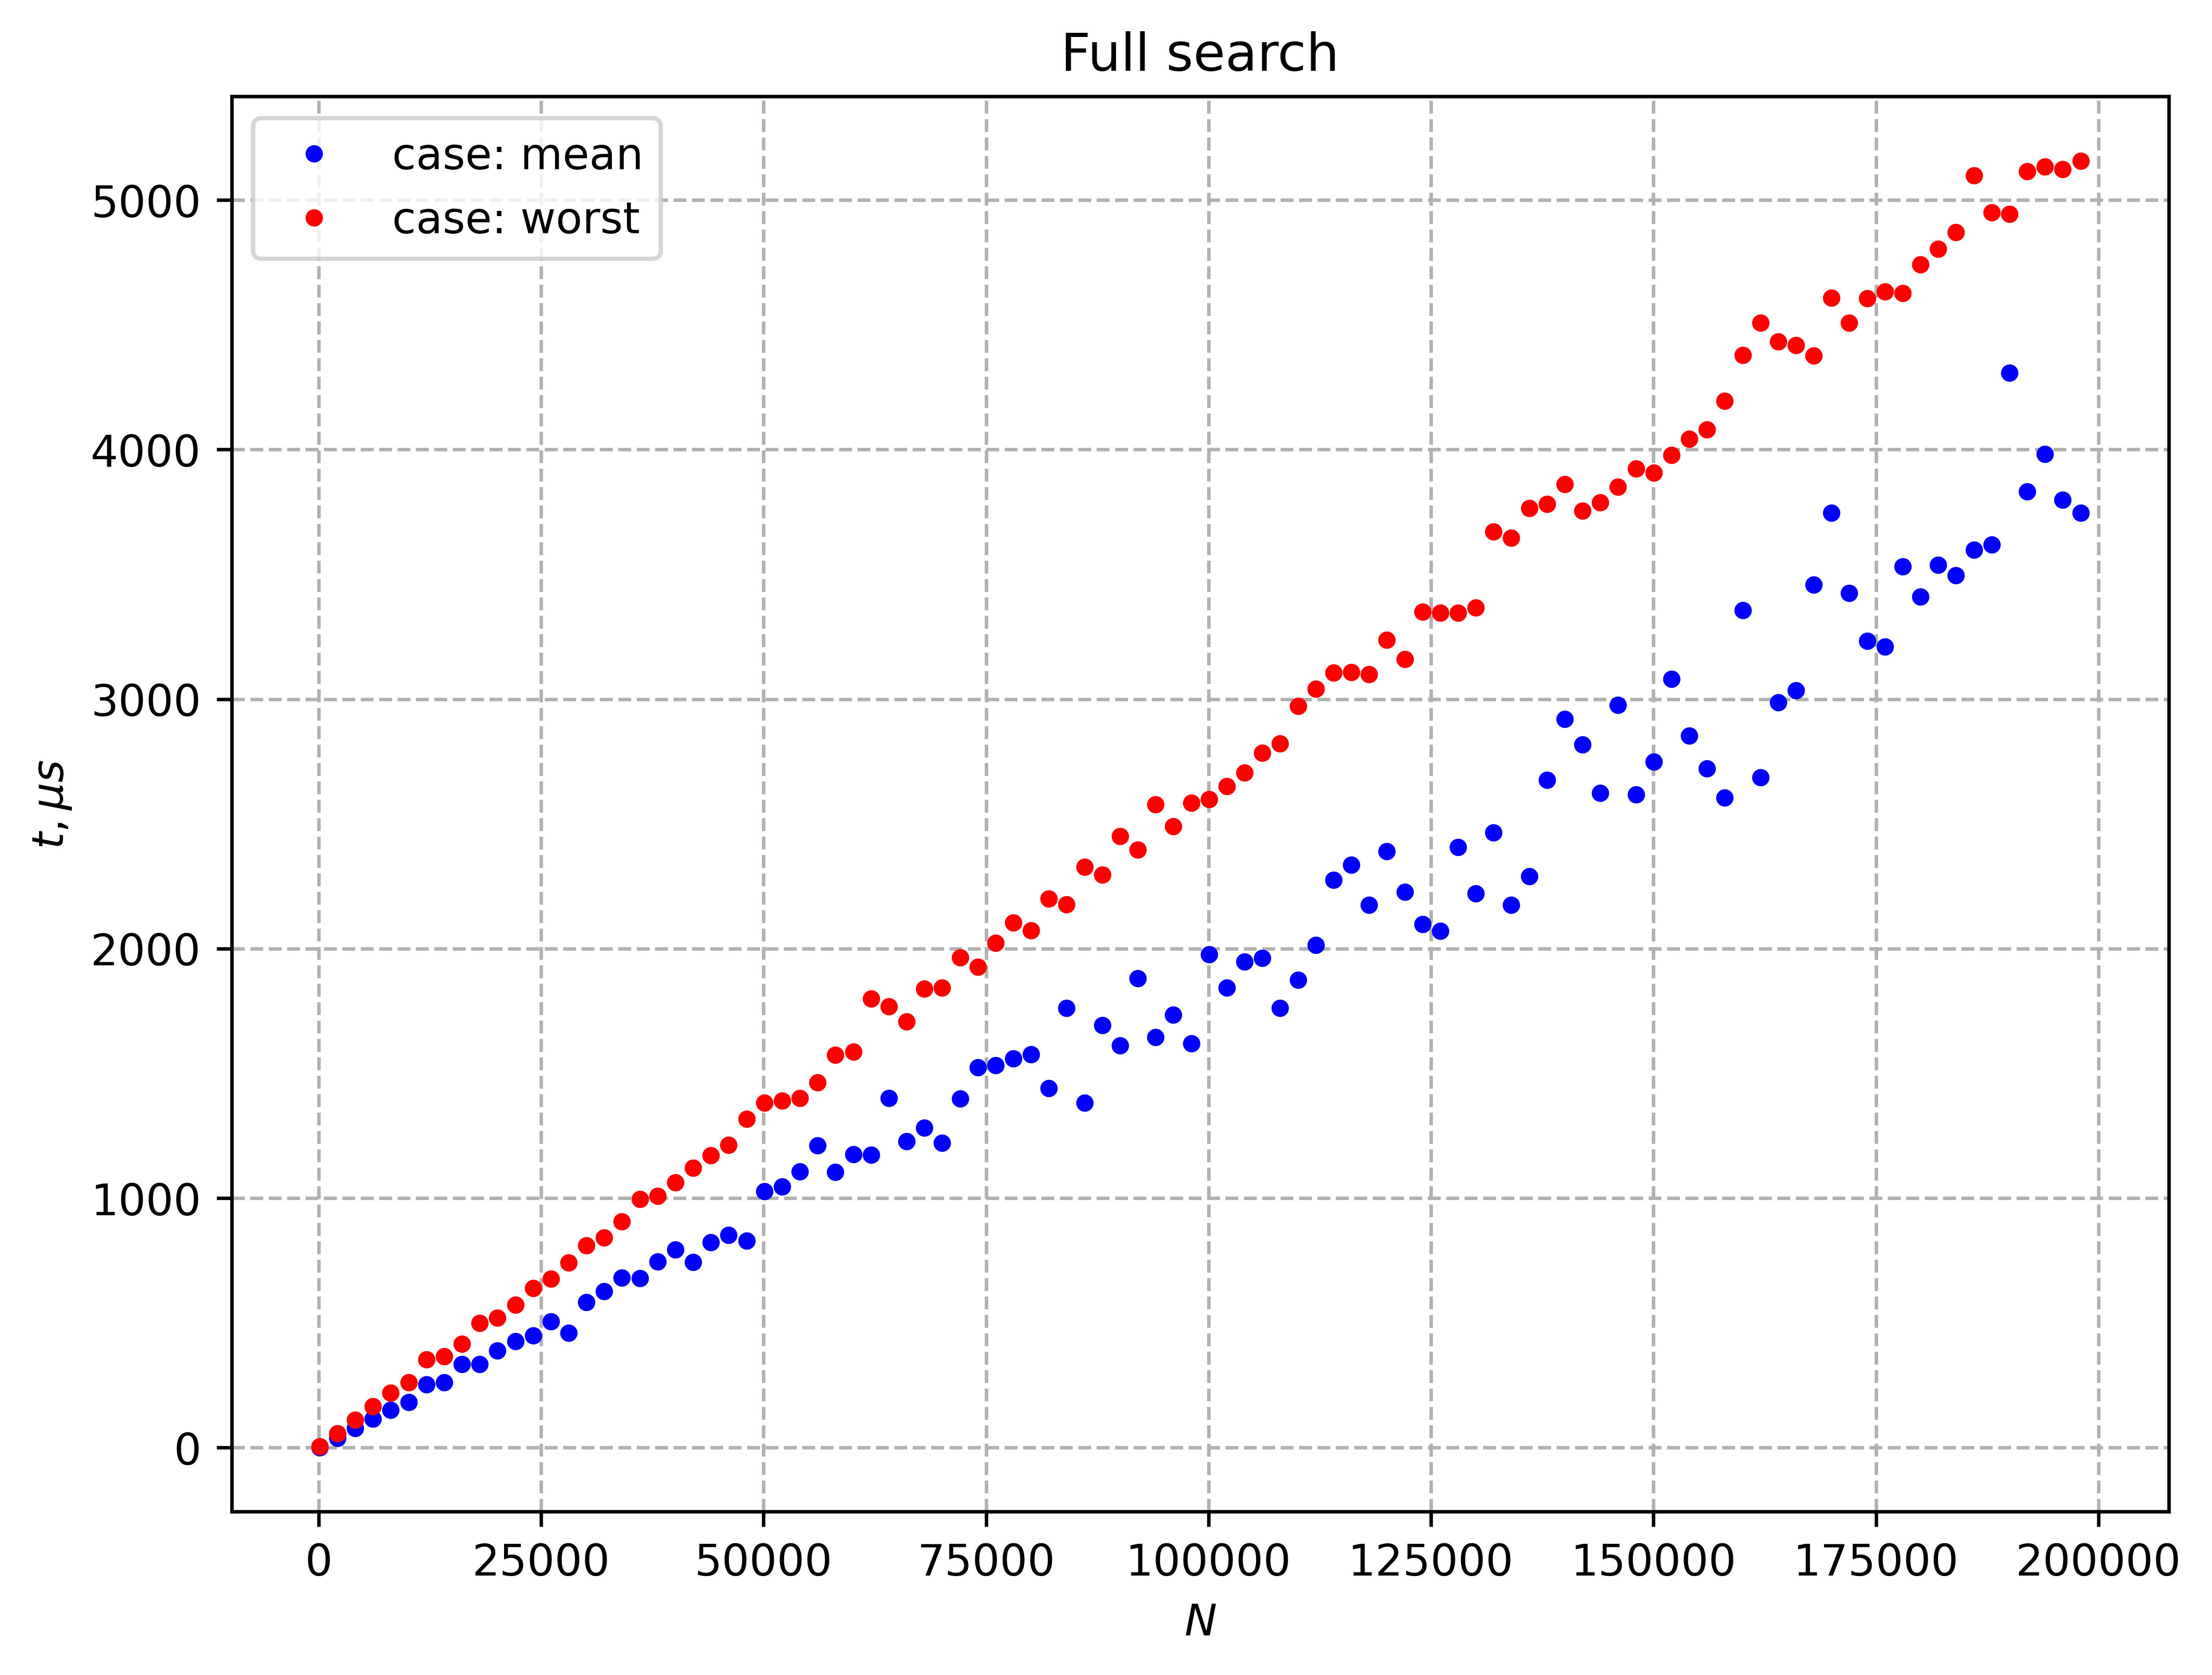

In [49]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Full search")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, µs$")
# plt.ylim([0, 5])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab1["N"], 10e-3*lab1["full_mean"], "b.", label="case: mean")
plt.plot(lab1["N"], 10e-3*lab1["full_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

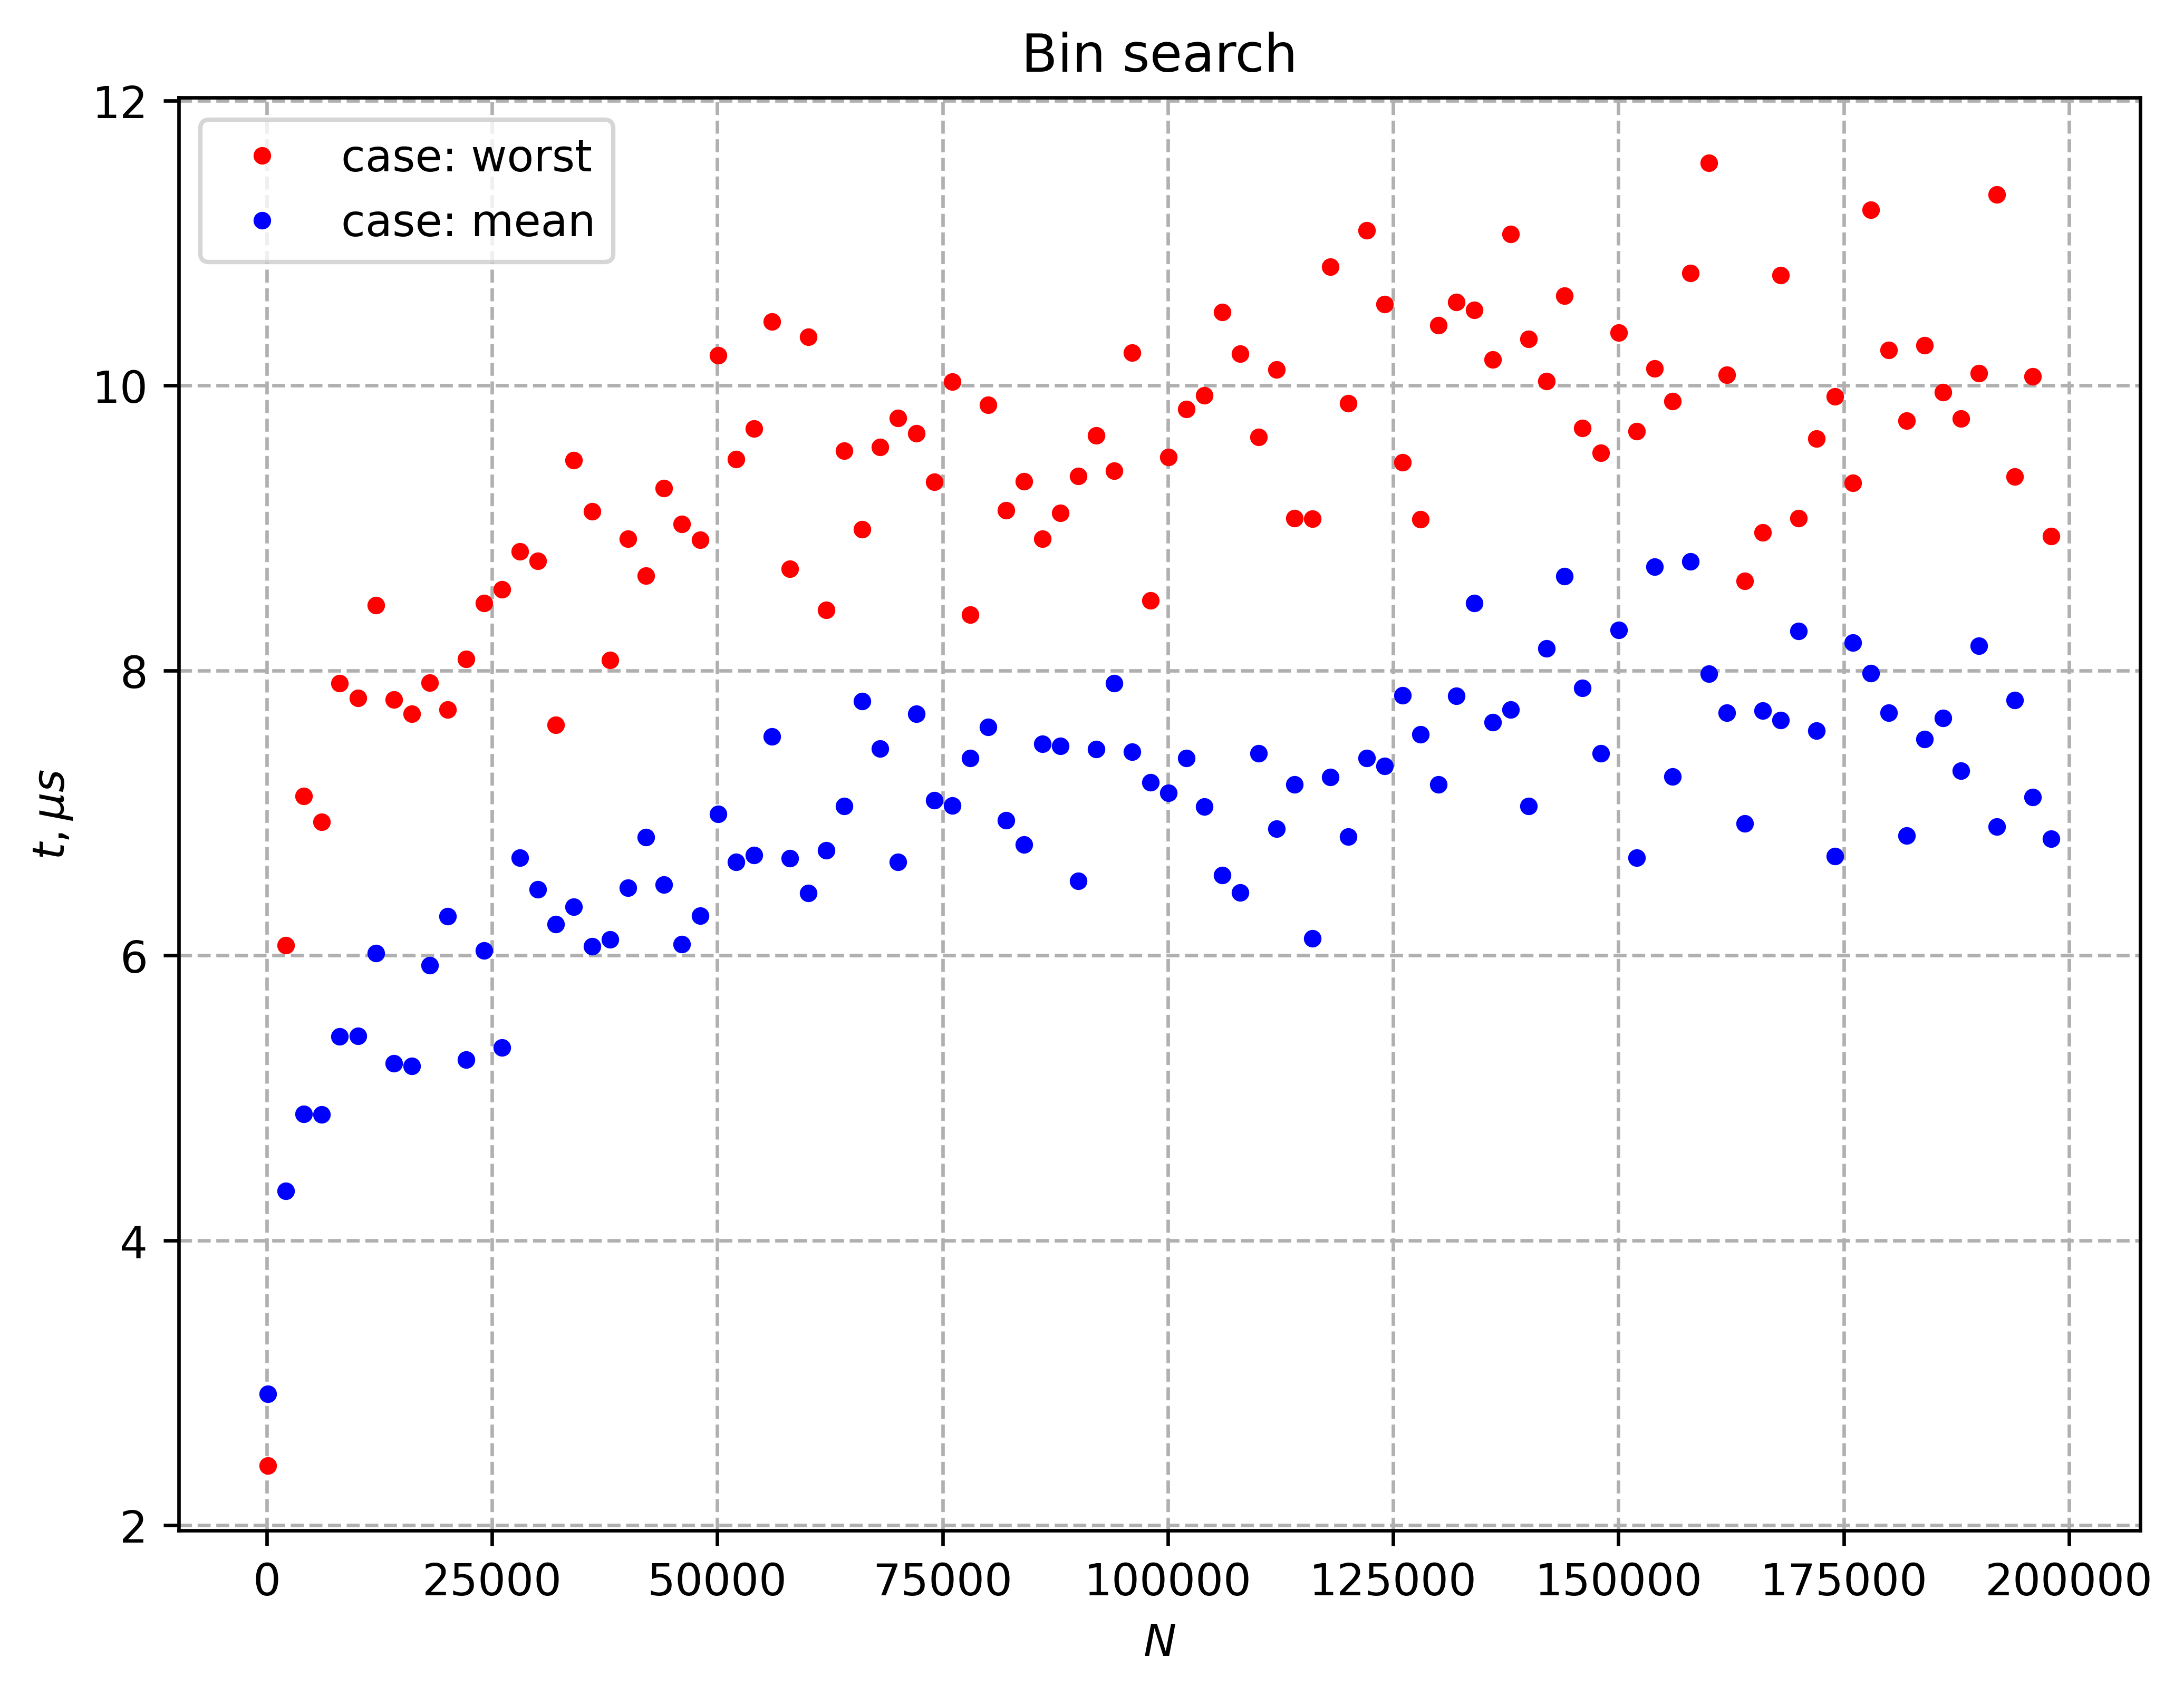

In [68]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Bin search")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, µs$")
# plt.ylim([0, 17.5])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab1["N"], 10e-3*lab1["bin_mean"], "r.", label="case: worst")
plt.plot(lab1["N"], 10e-3*lab1["bin_worst"], "b.", label="case: mean")

plt.legend()
plt.show()
# the last runned lined 

In [86]:
lab2 = pd.read_excel("sum_of_two.xlsx")
lab2

,N,test001,test002,test003,test004,test005,test011,test012,test013,test014,...,test101,test102,test103,test104,test105,test111,test112,test113,test114,test115
0,100,0.000225,0.000225,0.000225,0.00207,0.0016,0.0024,0.000007,0.000007,0.000032,...,0.000001,0.000001,7.000000e-07,7.000000e-07,7.000000e-07,0.000001,0.000010,0.000001,8.000000e-07,6.000000e-07
1,1099,0.000375,0.000375,0.000375,0.00212,0.0018,0.0024,0.000045,0.000070,0.000033,...,0.000004,0.000004,2.800000e-06,2.500000e-06,2.600000e-06,0.000004,0.000004,0.000004,3.500000e-06,2.400000e-06
2,2098,0.000335,0.000335,0.000335,0.00253,0.0022,0.0030,0.000034,0.000060,0.000036,...,0.000005,0.000007,4.000000e-06,3.800000e-06,3.600000e-06,0.000006,0.000006,0.000005,5.400000e-06,3.500000e-06
3,3097,0.000175,0.000175,0.000175,0.00209,0.0023,0.0022,0.000183,0.000669,0.000105,...,0.000010,0.000014,8.100000e-06,7.100000e-06,7.200000e-06,0.000012,0.000012,0.000012,1.030000e-05,6.800000e-06
4,4096,0.000300,0.000300,0.000300,0.00211,0.0017,0.0020,0.000022,0.000022,0.000013,...,0.000015,0.000017,1.270000e-05,1.450000e-05,1.060000e-05,0.000016,0.000015,0.000016,1.350000e-05,9.900000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95005,NaN,NaN,NaN,0.00316,0.0037,0.0039,0.006508,0.009669,0.007752,...,0.000290,0.000216,3.297000e-04,2.312000e-04,2.565000e-04,0.000352,0.000307,0.000387,3.309000e-04,3.599000e-04
96,96004,NaN,NaN,NaN,0.00318,0.0036,0.0035,0.000362,0.000422,0.000317,...,0.000335,0.000264,2.914000e-04,2.824000e-04,2.254000e-04,0.000379,0.000286,0.000414,2.894000e-04,4.395000e-04
97,97003,NaN,NaN,NaN,0.00330,0.0036,0.0038,0.001073,0.001576,0.000963,...,0.000341,0.000224,3.361000e-04,2.372000e-04,5.682000e-04,0.000353,0.000317,0.000395,3.045000e-04,4.065000e-04
98,98002,NaN,NaN,NaN,0.00323,0.0029,0.0026,0.000519,0.000617,0.000405,...,0.000268,0.000318,3.114000e-04,2.202000e-04,2.550000e-04,0.000360,0.000298,0.000342,2.616000e-04,3.743000e-04


In [87]:
lab2["full_mean"] = lab2[['test001', 'test002', 'test003']].mean(axis=1)
lab2["full_worst"] = lab2[['test011', 'test012', 'test013']].mean(axis=1)
lab2["linear_mean"] = lab2[['test101', 'test102', 'test103']].mean(axis=1)
lab2["linear_worst"] = lab2[['test111', 'test112', 'test113']].mean(axis=1)
lab2

,N,test001,test002,test003,test004,test005,test011,test012,test013,test014,...,test105,test111,test112,test113,test114,test115,full_mean,full_worst,linear_mean,linear_worst
0,100,0.000225,0.000225,0.000225,0.00207,0.0016,0.0024,0.000007,0.000007,0.000032,...,7.000000e-07,0.000001,0.000010,0.000001,8.000000e-07,6.000000e-07,0.000225,0.000805,9.333333e-07,0.000004
1,1099,0.000375,0.000375,0.000375,0.00212,0.0018,0.0024,0.000045,0.000070,0.000033,...,2.600000e-06,0.000004,0.000004,0.000004,3.500000e-06,2.400000e-06,0.000375,0.000839,3.700000e-06,0.000004
2,2098,0.000335,0.000335,0.000335,0.00253,0.0022,0.0030,0.000034,0.000060,0.000036,...,3.600000e-06,0.000006,0.000006,0.000005,5.400000e-06,3.500000e-06,0.000335,0.001031,5.333333e-06,0.000006
3,3097,0.000175,0.000175,0.000175,0.00209,0.0023,0.0022,0.000183,0.000669,0.000105,...,7.200000e-06,0.000012,0.000012,0.000012,1.030000e-05,6.800000e-06,0.000175,0.001017,1.073333e-05,0.000012
4,4096,0.000300,0.000300,0.000300,0.00211,0.0017,0.0020,0.000022,0.000022,0.000013,...,1.060000e-05,0.000016,0.000015,0.000016,1.350000e-05,9.900000e-06,0.000300,0.000681,1.476667e-05,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95005,NaN,NaN,NaN,0.00316,0.0037,0.0039,0.006508,0.009669,0.007752,...,2.565000e-04,0.000352,0.000307,0.000387,3.309000e-04,3.599000e-04,NaN,0.006692,2.784667e-04,0.000349
96,96004,NaN,NaN,NaN,0.00318,0.0036,0.0035,0.000362,0.000422,0.000317,...,2.254000e-04,0.000379,0.000286,0.000414,2.894000e-04,4.395000e-04,NaN,0.001428,2.968667e-04,0.000360
97,97003,NaN,NaN,NaN,0.00330,0.0036,0.0038,0.001073,0.001576,0.000963,...,5.682000e-04,0.000353,0.000317,0.000395,3.045000e-04,4.065000e-04,NaN,0.002150,3.002000e-04,0.000355
98,98002,NaN,NaN,NaN,0.00323,0.0029,0.0026,0.000519,0.000617,0.000405,...,2.550000e-04,0.000360,0.000298,0.000342,2.616000e-04,3.743000e-04,NaN,0.001245,2.989333e-04,0.000333


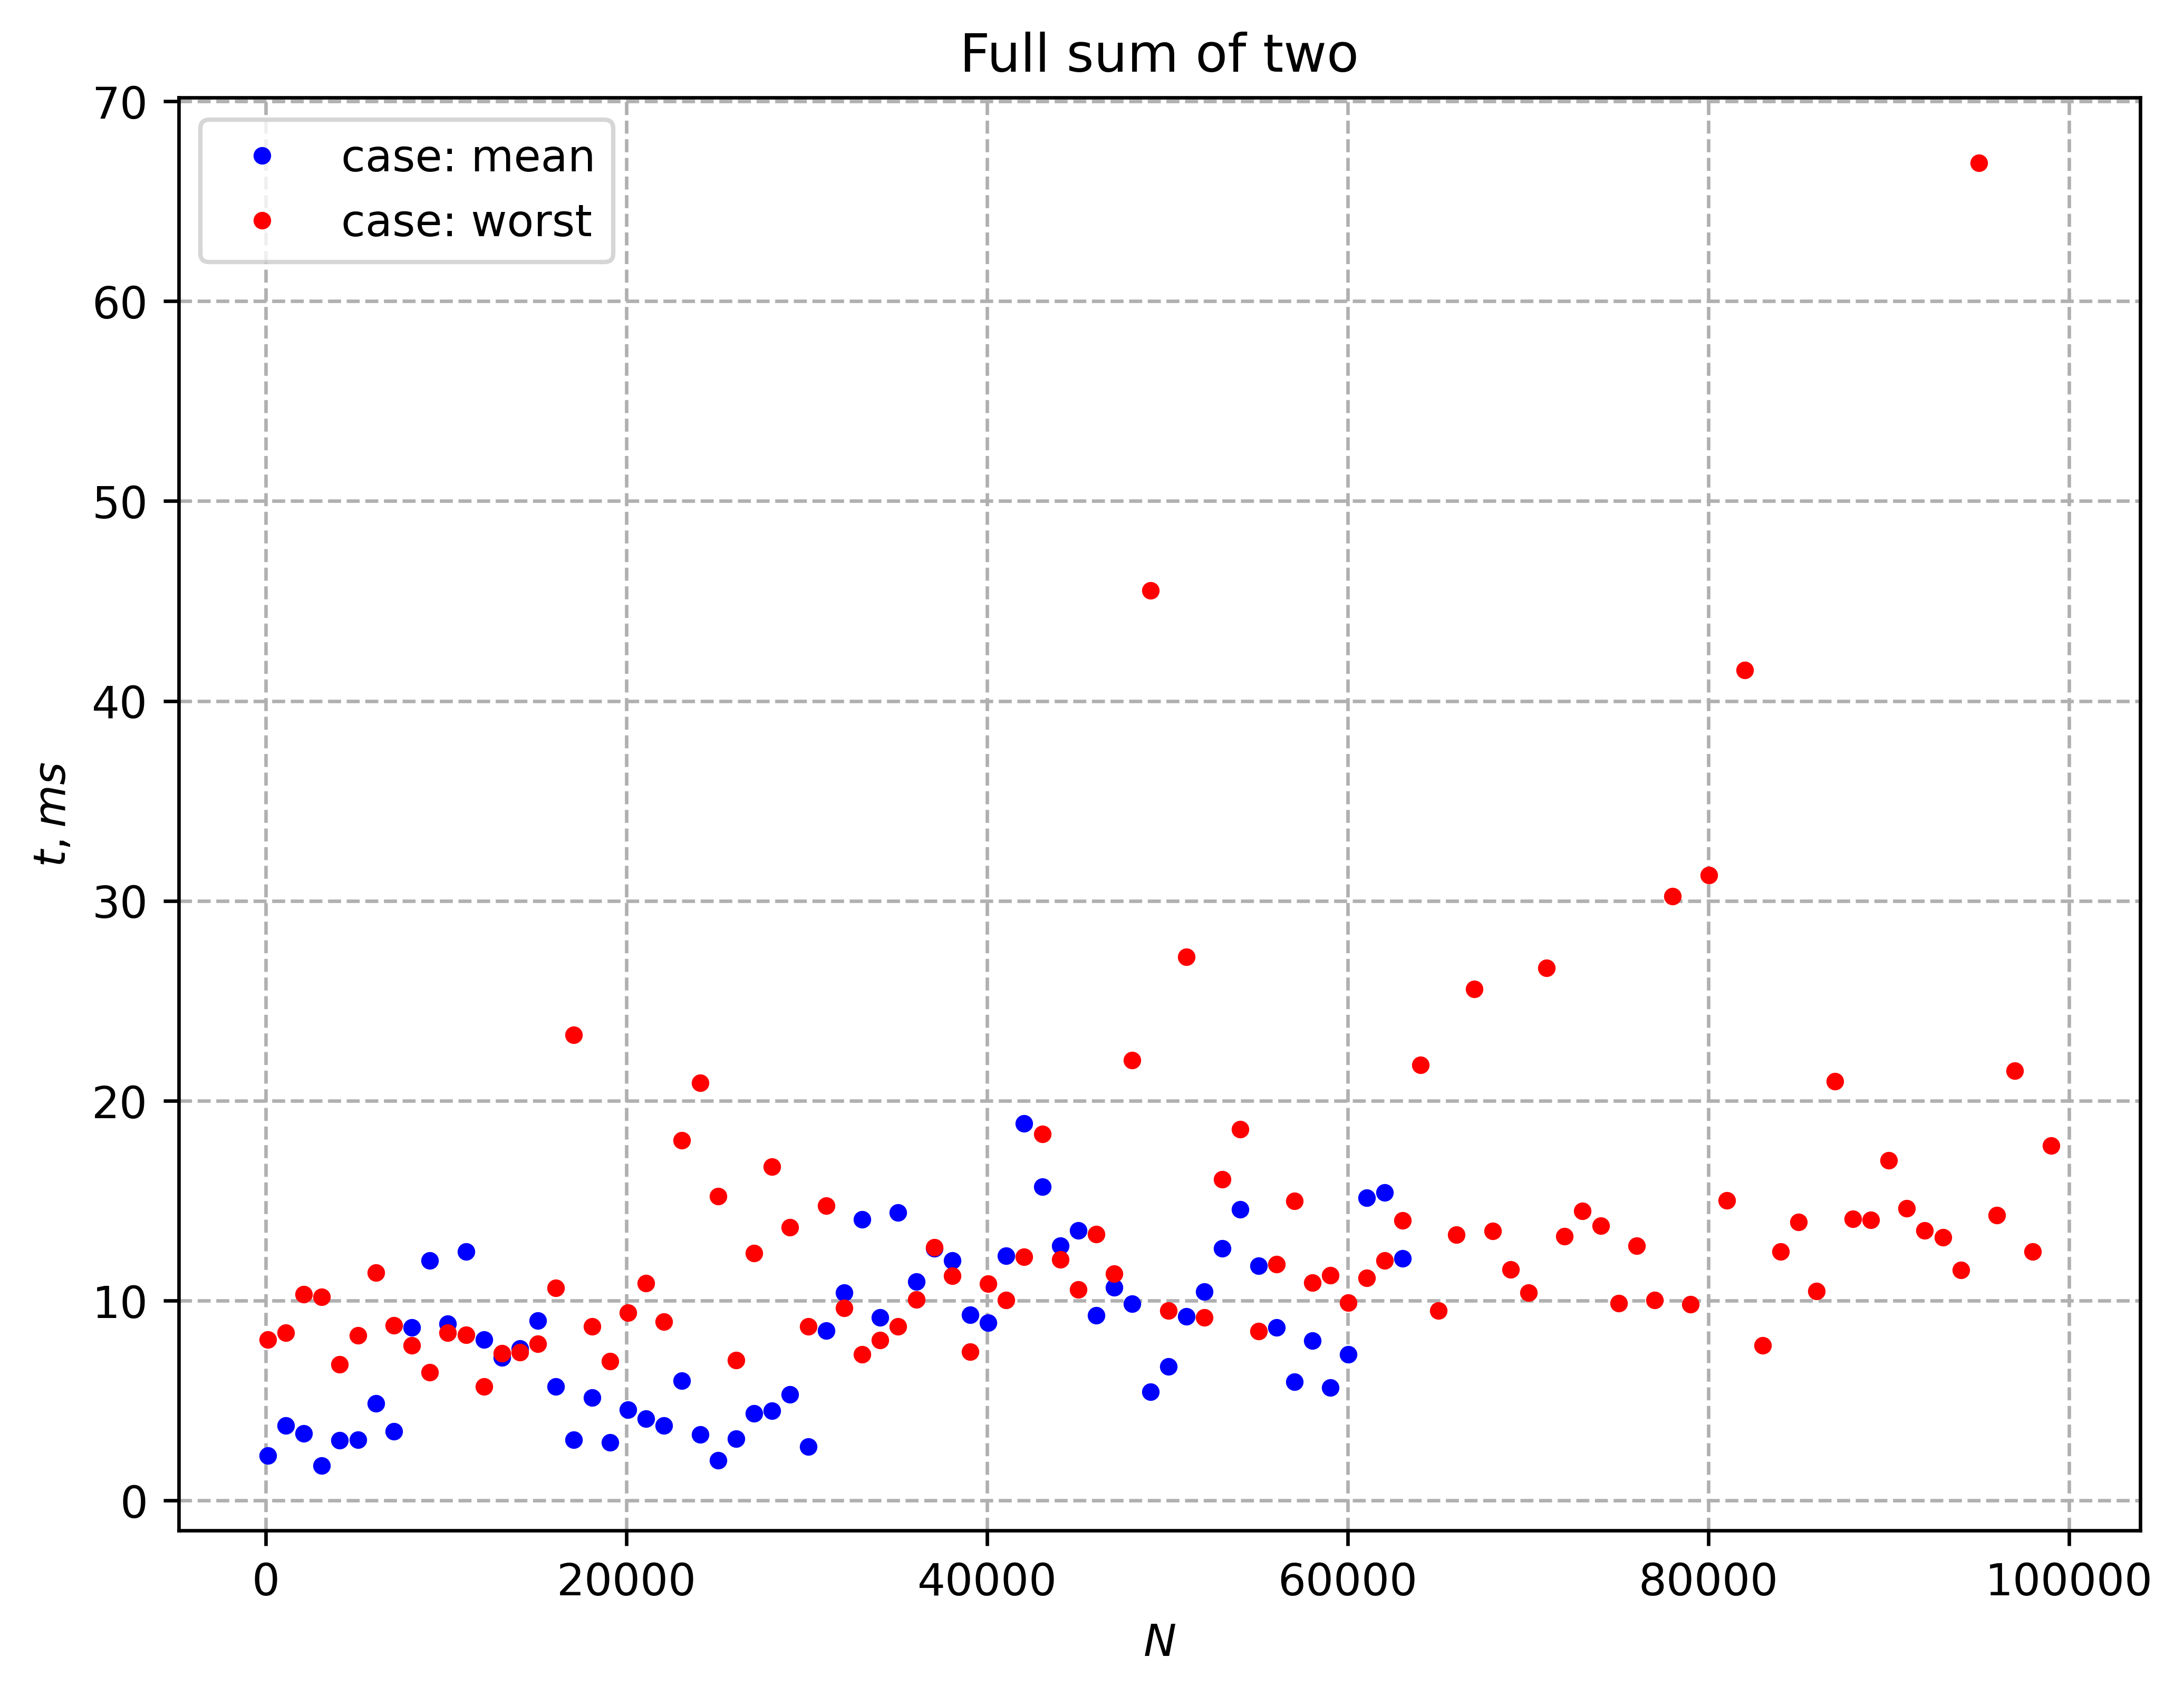

In [88]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Full sum of two")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, ms$")
# plt.ylim([0, 100])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], 10e3*lab2["full_mean"], "b.", label="case: mean")
plt.plot(lab2["N"], 10e3*lab2["full_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

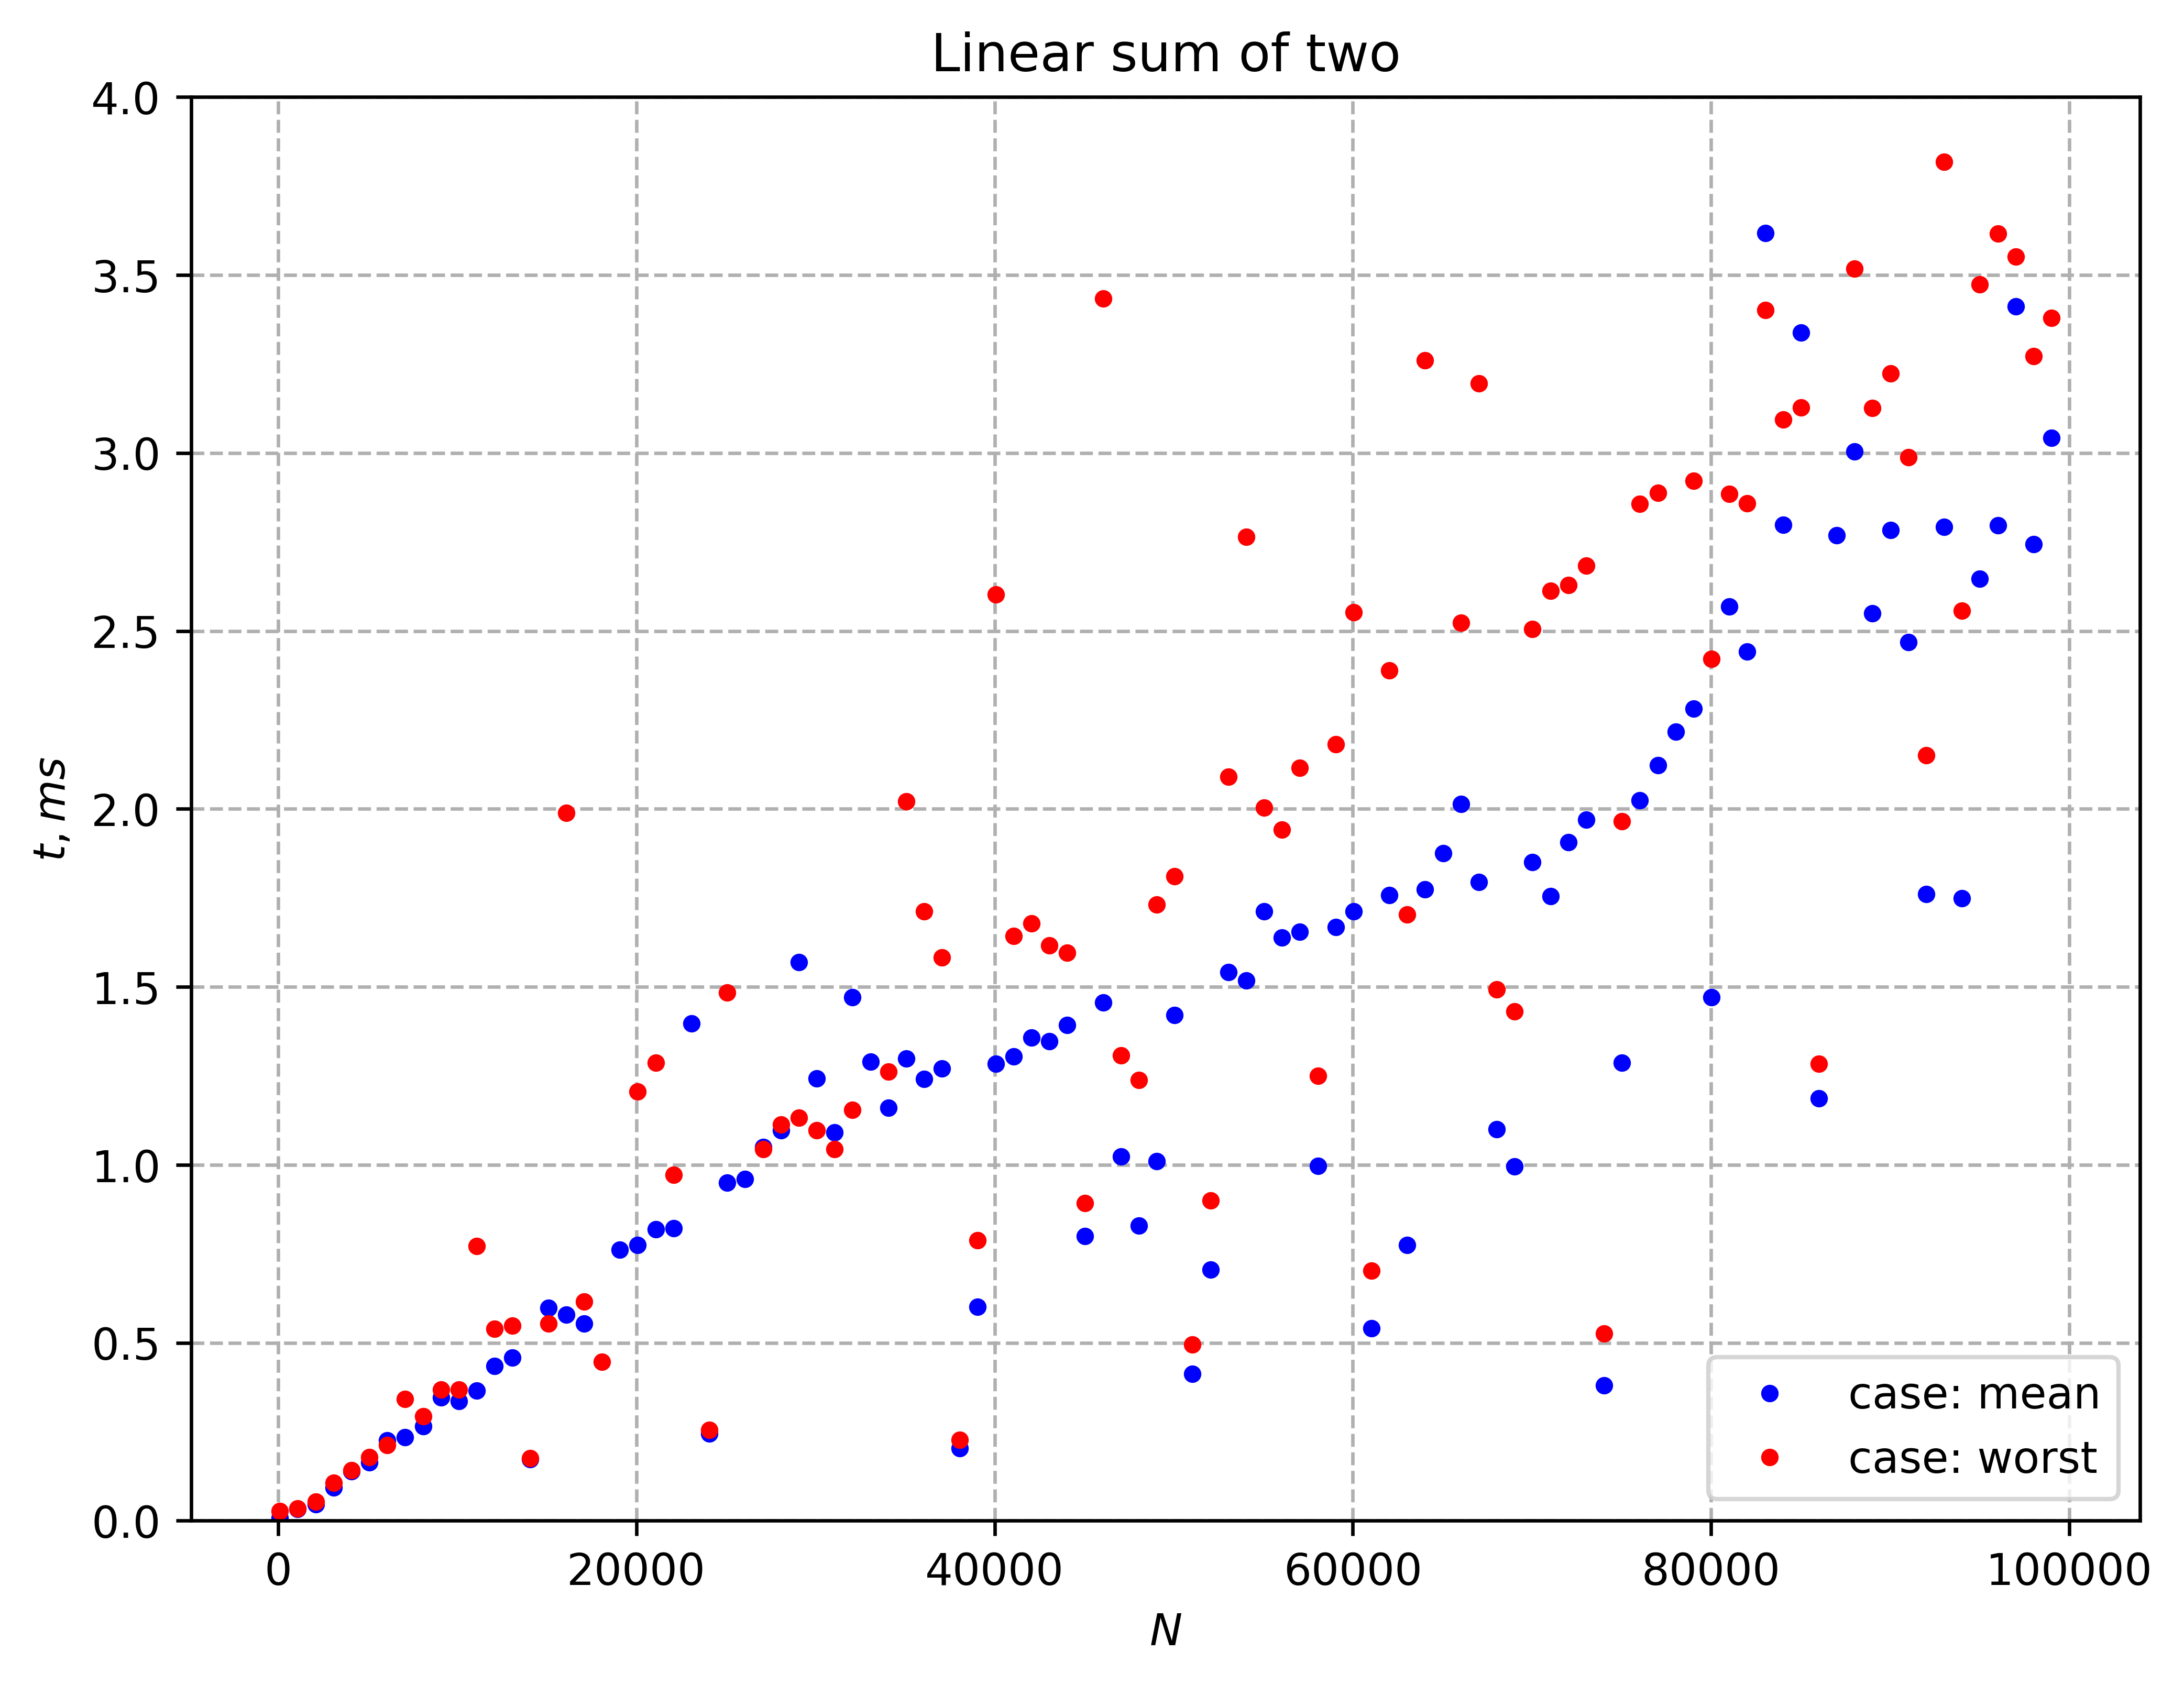

In [49]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Linear sum of two")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, ms$")
# plt.ylim([0, 4])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], 10e3*lab2["linear_mean"], "b.", label="case: mean")
plt.plot(lab2["N"], 10e3*lab2["linear_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

In [61]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Linear sum of two")
plt.xlabel("$ln(N/N_0)$") # подписи к осям
plt.ylabel("$ln(t/t_0), ms$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab2["log_N"] = np.log(lab2["N"] / max(lab2["N"])) 
lab2["log_linear_mean"] = np.log(lab2["linear_mean"] / max(lab2["linear_mean"]))
lab2["log_linear_worst"] = np.log(lab2["linear_worst"] / max(lab2["linear_worst"]))

k_mean, sigma_k_mean = lsm0(lab2["log_N"], lab2["log_linear_mean"])
k_worst, sigma_k_worst = lsm0(lab2["log_N"], lab2["log_linear_worst"])

plt.plot(lab2["log_N"], lab2["log_linear_mean"], 'g.', label="mean")
plt.plot(lab2["log_N"], k_mean*lab2["log_N"],'g--', 
         label=r"$k_{mean} = (%.3f \pm %.3f)$" % (k_mean, sigma_k_mean))

plt.plot(lab2["log_N"], lab2["log_linear_worst"], 'b.', label="worst")
plt.plot(lab2["log_N"], k_worst*lab2["log_N"],'b--', 
         label=r"$k_{worst} = (%.3f \pm %.3f)$" % (k_worst, sigma_k_worst))

plt.legend()
plt.show()